## Customer Segmentation - App Check

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

matplotlib.style.use('ggplot')

## UNCOMMENT TO ACTIVATE PLOTTING PROGRAM QT - USEFUL FOR ROTATING 3D PLOTS
#%matplotlib qt

### Questions
Can users be organized into groups based on the genre types of their purchases?
Can users be organized based on number of purchases and their overall playtime?
Can users be defined as 'types' of players?
Can the customer base be grouped to develop customized relationships?

Resources:
https://towardsdatascience.com/customer-segmentation-with-machine-learning-a0ac8c3d4d84

### Encode Genres per game

In [6]:
steam = pd.read_csv('datasets/steam_game_genres.csv')

In [7]:
steam.head(2)

,Unnamed: 0,name,genres
0,0,Counter-Strike,"[{'id': '1', 'description': 'Action'}]"
1,1,Team Fortress Classic,"[{'id': '1', 'description': 'Action'}]"


In [4]:
steam = steam[['name','genres']]

In [5]:
steam.to_csv('steam_game_genres.csv',)

In [63]:
steam.head(2)

,game,genres,indie,action,casual,adventure,strategy,simulation,early access,rpg,free_to_play,racing,sports,violent,gore,sexual_content,nudity,education,utilities
0,Counter-Strike,"[{'id': '1', 'description': 'Action'}]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Team Fortress Classic,"[{'id': '1', 'description': 'Action'}]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Categorizing genres from games dataset

# Create new column and check for genre
steam['indie'] = [i.find('Indie') if type(i) == str else 0 for i in steam['genres']]
steam['indie'] = [0 if i == -1 else 1 for i in steam['indie']]


# Create new column and check for genre
steam['action'] = [i.find('Action') if type(i) == str else 0 for i in steam['genres']]
steam['action'] = [0 if i == -1 else 1 for i in steam['action']]

# Create new column and check for genre
steam['casual'] = [i.find('Casual') if type(i) == str else 0 for i in steam['genres']]
steam['casual'] = [0 if i == -1 else 1 for i in steam['casual']]

# Create new column and check for genre
steam['adventure'] = [i.find('Adventure') if type(i) == str else 0 for i in steam['genres']]
steam['adventure'] = [0 if i == -1 else 1 for i in steam['adventure']]

# Create new column and check for genre
steam['strategy'] = [i.find('Strategy') if type(i) == str else 0 for i in steam['genres']]
steam['strategy'] = [0 if i == -1 else 1 for i in steam['strategy']]

# Create new column and check for genre
steam['simulation'] = [i.find('Simulation') if type(i) == str else 0 for i in steam['genres']]
steam['simulation'] = [0 if i == -1 else 1 for i in steam['simulation']]

# Create new column and check for genre
steam['early access'] = [i.find('Early Access') if type(i) == str else 0 for i in steam['genres']]
steam['early access'] = [0 if i == -1 else 1 for i in steam['early access']]

# Create new column and check for genre
steam['rpg'] = [i.find('RPG') if type(i) == str else 0 for i in steam['genres']]
steam['rpg'] = [0 if i == -1 else 1 for i in steam['rpg']]

# Create new column and check for genre
steam['free_to_play'] = [i.find('Free to Play') if type(i) == str else 0 for i in steam['genres']]
steam['free_to_play'] = [0 if i == -1 else 1 for i in steam['free_to_play']]

# Create new column and check for genre
steam['racing'] = [i.find('Racing') if type(i) == str else 0 for i in steam['genres']]
steam['racing'] = [0 if i == -1 else 1 for i in steam['racing']]
steam['racing'].head()

# Create new column and check for genre
steam['sports'] = [i.find('Sports') if type(i) == str else 0 for i in steam['genres']]
steam['sports'] = [0 if i == -1 else 1 for i in steam['sports']]

# Create new column and check for genre
steam['violent'] = [i.find('Violent') if type(i) == str else 0 for i in steam['genres']]
steam['violent'] = [0 if i == -1 else 1 for i in steam['violent']]

# Create new column and check for genre
steam['gore'] = [i.find('Gore') if type(i) == str else 0 for i in steam['genres']]
steam['gore'] = [0 if i == -1 else 1 for i in steam['gore']]

# Create new column and check for genre
steam['sexual_content'] = [i.find('Sexual Content') if type(i) == str else 0 for i in steam['genres']]
steam['sexual_content'] = [0 if i == -1 else 1 for i in steam['sexual_content']]

# Create new column and check for genre
steam['nudity'] = [i.find('Nudity') if type(i) == str else 0 for i in steam['genres']]
steam['nudity'] = [0 if i == -1 else 1 for i in steam['nudity']]

# Create new column and check for genre
steam['education'] = [i.find('Education') if type(i) == str else 0 for i in steam['genres']]
steam['education'] = [0 if i == -1 else 1 for i in steam['education']]

steam['utilities'] = [i.find('Utilities') if type(i) == str else 0 for i in steam['genres']]
steam['utilities'] = [0 if i == -1 else 1 for i in steam['utilities']]

In [5]:
steam.rename(columns={'name':'game'},inplace=True)

In [9]:
steam.head(2)

,game,genres,indie,action,casual,adventure,strategy,simulation,early access,rpg,free_to_play,racing,sports,violent,gore,sexual_content,nudity,education,utilities
0,Counter-Strike,"[{'id': '1', 'description': 'Action'}]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Team Fortress Classic,"[{'id': '1', 'description': 'Action'}]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Load User Data

In [12]:
games = pd.read_csv('datasets/steam_clean_recommender.csv')

In [13]:
games.head(2)

,user,game,purchase,play_time
0,151603712,Fallout 4,1.0,87.0
1,151603712,Spore,1.0,14.9


In [14]:
# Merge based on game
games = games.merge(steam, on='game')

In [15]:
genre_pref = games.groupby(by=['user']).sum()

In [16]:
genre_pref.head(2)

,purchase,play_time,indie,action,casual,adventure,strategy,simulation,early access,rpg,free_to_play,racing,sports,violent,gore,sexual_content,nudity,education,utilities
user,,,,,,,,,,,,,,,,,,,
5250,4.0,19.5,0,4,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0
76767,7.0,408.2,2,4,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0


### All genres
- Do PCA
- Cluster first 2 or 3

### Who are the typical Players

In [17]:
genre_pref['play_time'].quantile(q=0.50)

12.9

The top 50 percent of players have played at least 12.9 hrs on steam.

In [18]:
genre_pref['purchase'].quantile(q=0.75)

3.0

The top 25 percent of players have purchased at least 3 games. This is very low and indicates that majority of users only have 3 games on their account. Now is this because they play 1 game for many hours? or they tried one game and left it? Are these users more into console gaming?

Either way, these players are not interested in playing other games and can be removed from the sample.

What quantile of players have purchased more than 2 games?

In [19]:
genre_pref['purchase'].quantile(q=0.65)

2.0

What quantile of players have played more than 10hrs on steam?

In [20]:
genre_pref['play_time'].quantile(q=0.40)

5.700000000000001

In [21]:
#typ_users = genre_pref[genre_pref['play_time'] >= genre_pref['play_time'].quantile(q=0.40)]
typ_users = genre_pref[genre_pref['purchase'] >= 2]

Only consider users with more than 5hrs (top 53%) of play time, then only players who have purchased more than 2 games (top 20%).

These are active users on steam.

In [22]:
len(typ_users)

3287

In [23]:
typ_users['purchase'].describe()

count    3287.000000
mean        9.780651
std        15.655420
min         2.000000
25%         2.000000
50%         4.000000
75%        10.000000
max       282.000000
Name: purchase, dtype: float64

Only 3287 users remain from this dataset.

In [24]:
typ_users.describe()

,purchase,play_time,indie,action,casual,adventure,strategy,simulation,early access,rpg,free_to_play,racing,sports,violent,gore,sexual_content,nudity,education,utilities
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,9.780651,424.010709,4.365987,6.975662,1.168239,2.971402,1.898388,1.625799,0.227563,2.224521,2.913599,0.156678,0.182233,0.073623,0.048372,0.030727,0.066018,0.008823,0.023426
std,15.655420,799.210152,9.418432,10.095105,2.706475,5.617318,4.002588,3.040792,0.633749,4.080904,3.332802,0.598820,0.597174,0.295113,0.233597,0.241657,0.311415,0.102827,0.168409
min,2.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.150000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,100.300000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,457.450000,4.000000,8.000000,1.000000,3.000000,2.000000,2.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,282.000000,10445.700000,189.000000,169.000000,65.000000,96.000000,80.000000,37.000000,9.000000,49.000000,30.000000,12.000000,7.000000,3.000000,3.000000,6.000000,6.000000,2.000000,3.000000


In [25]:
# Remove columns with 0 instances in 75% of the users
typ_users = typ_users.drop(columns=['early access','racing','sports','violent','gore','sexual_content','nudity','education','utilities'])

In [26]:
typ_users.describe()

,purchase,play_time,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,9.780651,424.010709,4.365987,6.975662,1.168239,2.971402,1.898388,1.625799,2.224521,2.913599
std,15.655420,799.210152,9.418432,10.095105,2.706475,5.617318,4.002588,3.040792,4.080904,3.332802
min,2.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.150000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,100.300000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,10.000000,457.450000,4.000000,8.000000,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000
max,282.000000,10445.700000,189.000000,169.000000,65.000000,96.000000,80.000000,37.000000,49.000000,30.000000


In [27]:
# Save File with final number of players
typ_users.to_csv('datasets/df_segment_pre.csv',index=False)

In [28]:
typ_users = pd.read_csv('datasets/df_segment_pre.csv')

## PCA

In [29]:
X = typ_users.drop(columns=['play_time','purchase'])
# Instantiate our StandardScaler.
ss = StandardScaler()

# Scale X_train.
X_ss = ss.fit_transform(X)

In [30]:
# Instantiate PCA with 3 components.
pca = PCA(n_components=3)

In [31]:
# Fit PCA to training data.
pc = pca.fit_transform(X_ss)

In [32]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (6 components): {np.round(var_exp[:10], 3)}')
print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (6 components): {np.round(cum_var_exp[:10], 3)}')

Explained variance (6 components): [0.752 0.099 0.061]

Cumulative explained variance (6 components): [0.752 0.851 0.912]


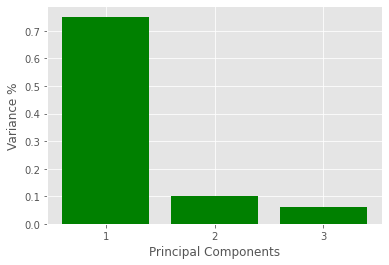

In [33]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);

In [34]:
# Putting components in a dataframe for later
PCA_components = pd.DataFrame(pc)

In [35]:
PCA_components.describe()

,0,1,2
count,3.287000e+03,3.287000e+03,3.287000e+03
mean,2.513961e-16,5.929408e-16,6.687684e-17
std,2.452327e+00,8.904441e-01,7.013390e-01
min,-1.547485e+00,-6.998040e+00,-8.226956e+00
25%,-1.203713e+00,-2.296729e-01,-1.369796e-01
50%,-8.382705e-01,1.002435e-01,5.288867e-02
75%,1.401404e-01,4.692416e-01,2.187926e-01
max,4.248782e+01,7.979312e+00,1.433330e+01


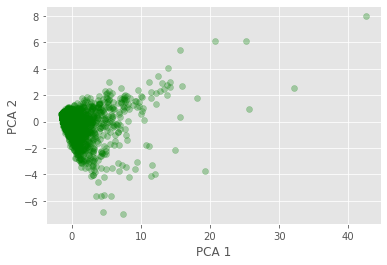

In [36]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [37]:
# plt.scatter(PCA_components[1], PCA_components[2], alpha=.3, color='blue')
# plt.xlabel('PCA 2')
# plt.ylabel('PCA 3')
# plt.show()

In [38]:
# plt.scatter(PCA_components[0], PCA_components[2], alpha=.3, color='peru')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 3')
# plt.show()

In [39]:
scores = []
for k in range(2, 50):
    cl = KMeans(n_clusters=k)
    cl.fit(X_ss)
    inertia = cl.inertia_
    sil = silhouette_score(X_ss, cl.labels_)
    scores.append([k, inertia, sil])
score_df = pd.DataFrame(scores, columns=['k', 'inertia', 'silhouette'])

Text(0.5, 1.0, 'Silhouette Score over k')

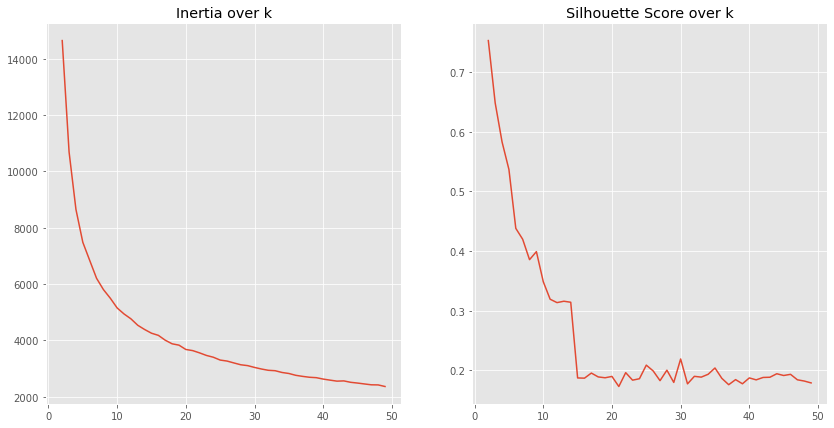

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [41]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3)

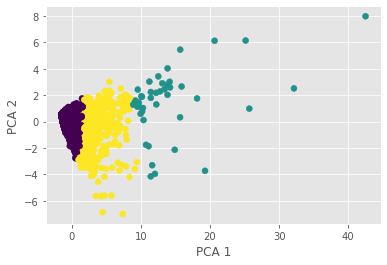

In [42]:
labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

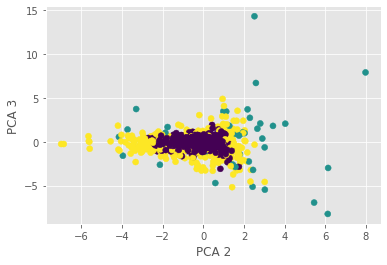

In [43]:
plt.scatter(PCA_components[1], PCA_components[2], c=labels)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.show()

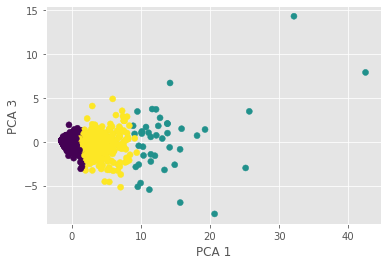

In [44]:
plt.scatter(PCA_components[0], PCA_components[2], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')
plt.show()

In [45]:
X['cluster'] = model.labels_
X.head()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
0,0,4,0,1,1,0,0,2,0
1,2,4,0,2,2,1,0,0,0
2,1,7,0,4,0,0,2,0,0
3,0,6,0,0,1,0,0,1,0
4,51,60,9,47,18,15,26,3,1


In [46]:
## Plot scatter by cluster / color, and centroids
colors = ["red", "dodgerblue", "peru", "darkorange", "gold", 
          "greenyellow", "green", "turquoise", 
        "blue", "darkviolet"
          "magenta", "deeppink"]
X['color'] = X['cluster'].map(lambda p: colors[p])

<ipython-input-47-0a48895a1c14>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


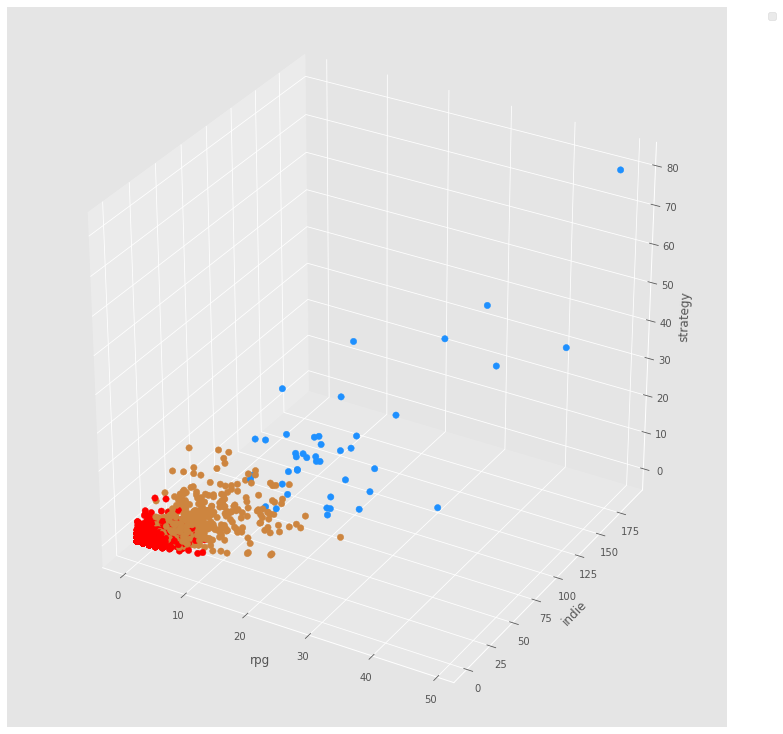

In [47]:
# generate data
x = X['rpg']#PCA_components[0]
y = X['indie']#PCA_components[1]
z = X['strategy']#PCA_components[2]

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=X['color'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('rpg')
ax.set_ylabel('indie')
ax.set_zlabel('strategy')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

### Inspect Clusters

In [48]:
cluster_0 = X[X.cluster == 0]
cluster_0.describe()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
count,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.0
mean,1.865724,4.051590,0.577739,1.436749,0.944523,0.823322,1.055477,2.140989,0.0
std,2.136966,3.252346,0.885929,1.738282,1.188833,1.261450,1.444910,2.030933,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.0
75%,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.0
max,13.000000,30.000000,8.000000,12.000000,12.000000,12.000000,10.000000,12.000000,0.0


In [49]:
cluster_1 = X[X.cluster == 1]
cluster_1.describe()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,59.767442,61.255814,14.604651,34.046512,24.441860,15.767442,23.883721,8.488372,1.0
std,31.927624,26.054972,12.524527,16.344438,14.821642,7.640236,9.222667,6.652504,0.0
min,21.000000,18.000000,0.000000,11.000000,7.000000,3.000000,9.000000,0.000000,1.0
25%,41.000000,47.500000,8.500000,23.500000,15.000000,11.000000,18.000000,4.000000,1.0
50%,55.000000,55.000000,11.000000,30.000000,20.000000,14.000000,22.000000,6.000000,1.0
75%,66.000000,71.500000,16.000000,37.500000,28.500000,18.500000,26.000000,11.000000,1.0
max,189.000000,169.000000,65.000000,96.000000,80.000000,37.000000,49.000000,28.000000,1.0


In [50]:
cluster_2 = X[X.cluster == 2]
cluster_2.describe()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0
mean,15.702899,21.326087,3.809179,10.234300,6.077295,5.642512,7.966184,7.615942,2.0
std,8.922108,9.877822,2.962201,5.799781,4.335094,3.914675,4.277744,5.111809,0.0
min,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,9.000000,14.000000,2.000000,6.000000,3.000000,3.000000,5.000000,4.000000,2.0
50%,13.000000,19.000000,3.000000,9.000000,5.000000,5.000000,7.000000,7.000000,2.0
75%,20.000000,27.000000,5.000000,14.000000,8.000000,8.000000,10.000000,11.000000,2.0
max,50.000000,57.000000,21.000000,33.000000,26.000000,26.000000,27.000000,30.000000,2.0


In [51]:
# Save X final
X.to_csv('datasets/df_segment_cluster.csv',index=False)

These two cluster essentially split the group into two categories.

**Characteristics of Clusters**

*Cluster 0*
- non Steam gamers
- 75% have only purhased 2 games
- 75% enjoy 2 action games

*Cluster 1*
- active gamers on Steam
- 75% of users have at most 52 games
- order of games purchased more likely (note that games have a combination of genres)
    - action
    - indie
    - adventure
    - rpg
    - simulation
    - free-to-play

## Cluster for cluster 0

In [52]:
X_0 = cluster_0.drop(columns=['cluster','color'])

In [53]:
# Scale X_train.
X_0_ss = ss.fit_transform(X_0)

In [54]:
scores = []
for k in range(2, 40):
    cl = KMeans(n_clusters=k)
    cl.fit(X_0_ss)
    inertia = cl.inertia_
    sil = silhouette_score(X_0_ss, cl.labels_)
    scores.append([k, inertia, sil])
score_df = pd.DataFrame(scores, columns=['k', 'inertia', 'silhouette'])

Text(0.5, 1.0, 'Silhouette Score over k')

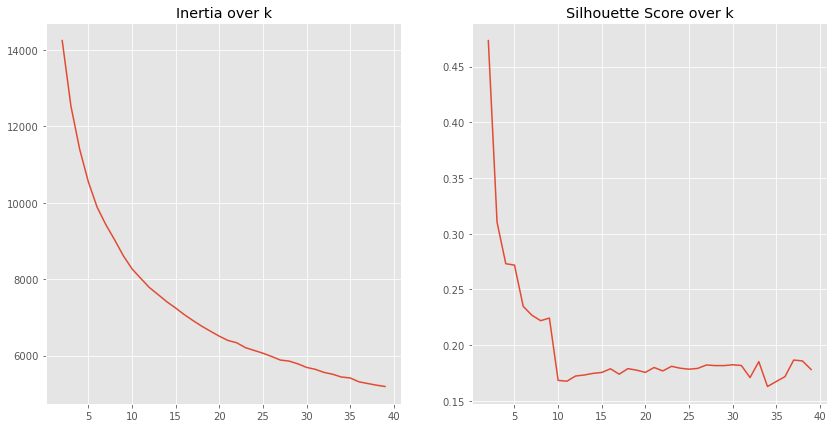

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [56]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_0_ss)

X_0['cluster'] = km.labels_

## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(ss.inverse_transform(km.cluster_centers_))

In [57]:
## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "gold"]
X_0['color'] = X_0['cluster'].map(lambda p: colors[p])

In [58]:
X_0['cluster'] = km.labels_
X_0.head(2)

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster,color
0,0,4,0,1,1,0,0,2,0,red
1,2,4,0,2,2,1,0,0,0,red


### New Clusters for Non-Gamers

In [59]:
#Red
X_0_red = X_0[X_0['cluster'] == 0]
X_0_red.describe()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
count,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2174.0
mean,0.990340,2.814627,0.322907,0.798528,0.639374,0.453082,0.535879,1.551978,0.0
std,1.055914,1.757018,0.576148,0.966954,0.772059,0.765908,0.768902,1.281327,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
75%,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0
max,6.000000,15.000000,8.000000,6.000000,7.000000,8.000000,4.000000,9.000000,0.0


In [60]:
# Green
X_0_green = X_0[X_0['cluster'] == 1]
X_0_green.describe()

,indie,action,casual,adventure,strategy,simulation,rpg,free_to_play,cluster
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.0
mean,4.766768,8.150915,1.422256,3.551829,1.955793,2.050305,2.777439,4.092988,1.0
std,2.247752,3.679126,1.165690,2.028890,1.671365,1.721592,1.786081,2.720386,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.000000,6.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.0
50%,4.000000,8.000000,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.0
75%,6.000000,10.000000,2.000000,5.000000,3.000000,3.000000,4.000000,6.000000,1.0
max,13.000000,30.000000,7.000000,12.000000,12.000000,12.000000,10.000000,12.000000,1.0


### Indie Free_to_Play RPG

<ipython-input-61-1141a3922da0>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


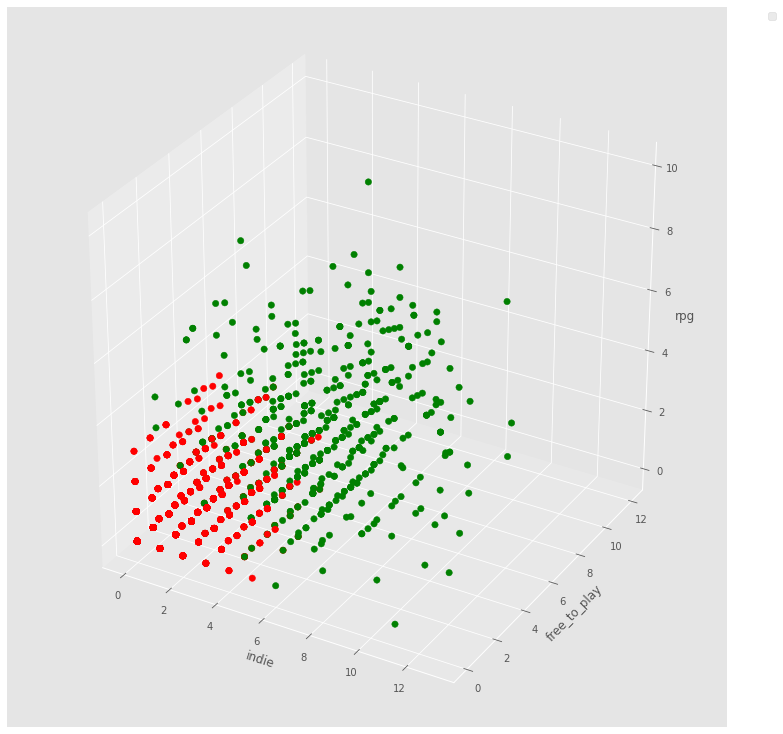

In [61]:
# generate data
n = 200
x = X_0['indie']
y = X_0['free_to_play']
z = X_0['rpg']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=X_0['color'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('indie')
ax.set_ylabel('free_to_play')
ax.set_zlabel('rpg')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

### Action Casual Free_to_play

In [62]:
# generate data
n = 200
x = X_non_gamers['action']
y = X_non_gamers['casual']
z = X_non_gamers['free_to_play']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=X_non_gamers['color'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('indie')
ax.set_ylabel('free_to_play')
ax.set_zlabel('rpg')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

NameError: name 'X_non_gamers' is not defined

### Simulation Action Strategy

In [ ]:
# generate data
n = 200
x = X_0['simulation']
y = X_0['action']
z = X_0['strategy']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=X_0['color'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('indie')
ax.set_ylabel('free_to_play')
ax.set_zlabel('rpg')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')